In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [2]:
learning_rate = 1e-2
training_epochs = 1000
display_step = 100

In [3]:
Xtr = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Ytr = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = Xtr.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32, shape=[n_samples])
Y = tf.placeholder(tf.float32, shape=[n_samples])

# Set model weights
W = tf.Variable( tf.random_normal([]), name="weight")
b = tf.Variable( tf.random_normal([]), name="bias")

In [5]:
# Construct a linear model
pred = (tf.multiply(X, W) + b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0100 cost= 0.096901596 W= 0.331758 b= 0.230763
Epoch: 0200 cost= 0.092594258 W= 0.322594 b= 0.29573
Epoch: 0300 cost= 0.089215852 W= 0.314479 b= 0.353267
Epoch: 0400 cost= 0.086566031 W= 0.307291 b= 0.404222
Epoch: 0500 cost= 0.084487684 W= 0.300926 b= 0.449351
Epoch: 0600 cost= 0.082857549 W= 0.295288 b= 0.489317
Epoch: 0700 cost= 0.081578948 W= 0.290296 b= 0.524713
Epoch: 0800 cost= 0.080576107 W= 0.285874 b= 0.556061
Epoch: 0900 cost= 0.079789534 W= 0.281958 b= 0.583823
Epoch: 1000 cost= 0.079172581 W= 0.27849 b= 0.60841
Optimization Finished!
Training cost= 0.0791726 W= 0.27849 b= 0.60841 



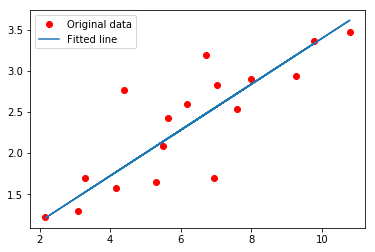

In [11]:
# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: Xtr, Y: Ytr})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c_, w_, b_ = sess.run([cost, W, b], feed_dict={X: Xtr, Y:Ytr})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c_), \
                "W=", w_, "b=", b_)

    print ("Optimization Finished!")
    c_, w_, b_, pred_ = sess.run([cost, W, b, pred], feed_dict={X: Xtr, Y:Ytr})
    print ("Training cost=", c_, "W=", w_, "b=", b_, '\n')

    #Graphic display
    plt.plot(Xtr, Ytr, 'ro', label='Original data')
    plt.plot(Xtr, pred_, label='Fitted line')
    plt.legend()
    plt.show()                                            